In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

digits = load_digits()
data = digits.data
data.shape

(1797, 64)

In [17]:
digits.target[0]

0

In [18]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

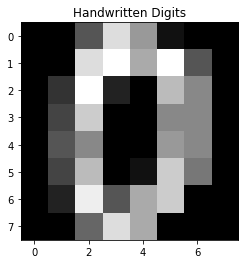

In [19]:
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[0])
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25, random_state=666)

## 默认参数的决策树

In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  # 决策树算法的输入不需要进行标准化

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
clf.score(X_test, y_test)

0.8466666666666667

In [40]:
y_predict = clf.predict(X_test)
y_predict[0]

8

In [41]:
y_prob = clf.predict_proba(X_test)
y_prob[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

## 决策树参数调优

In [61]:
clf1 = DecisionTreeClassifier()

max_depth = range(1,20,1)
min_samples_leaf = range(1,10,2)
tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

clf_grid = GridSearchCV(clf1, tuned_parameters, cv=10)
clf_grid.fit(X_train, y_train)

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10, 2)},
             pre_dis

In [62]:
clf_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
clf_grid.best_params_

{'max_depth': 13, 'min_samples_leaf': 1}

In [64]:
clf_grid.best_score_

0.8433556050482554

In [65]:
clf_grid.score(X_test, y_test)

0.8422222222222222

```默认参数的决策树预测准确率为84.6%，用GridSearchCV简单调参之后准确率为84.2%，还不如不调。。。```